# Jednadžba ravnoteže


Zadana je kvadratna ploča sa stranicama duljine $\pi$. Bočne stranice su izolirane, gornji rub se održava na temperaturi $g(x)$, a donji na temperaturi $0$. Želimo naći stabilno stanje razdiobe temperature $u(x,y)$.

Ignorirajući prijelazne pojave koje ovise o vremenu dobili smo problem ravnoteže u 2D:

\begin{align*}
&u_{xx}+u_{yy}=0,\quad 0<x,y<\pi\\
&u_x(0,y)=0,\quad u_x(\pi,y)=0,\quad 0<y<\pi \\
&u(x,0)=0,\quad u(x,\pi)=g(x),\quad 0<x<\pi.
\end{align*}

Prema klasfikaciji, PDJ je eliptička, i može se riješiti separacijom varijabli i svođenjem na SLP.

Pretpostavimo da je 

$$
u(x,y)=X(x) \cdot Y(y).
$$

Jednadžba glasi

$$
X''\cdot Y=-Y\cdot X'',
$$

odnosno

$$
\displaystyle\frac{X''}{X}=-\frac{Y''}{Y}=-\lambda.
$$

Iz rubnih uvjeta vidimo da možemo definirati regularni SLP po varijabli $x$:

\begin{align*}
&X''=-\lambda X,\quad 0<x<\pi\\
&X'(0)=0,\quad X'(\pi)=0.
\end{align*}

Kao i do sada, analizirajmo posebno tri slučaja:



__Slučaj 1.__ Za $\lambda=0$ je $X=ax+b$, $X'=a$, pa rubni uvjeti povlače $a=0$. Dakle, $\lambda_0=0$ je svojstvena vrijednost, a $X_0=1$ je pripadna svojstvena funkcija.

Druga jednadžba glasi

$$
Y''=0,
$$

pa je $Y_0(y)=a_0y+b_0$.


__Slučaj 2.__ Za $\lambda<0$ je

\begin{align*}
X&=a e^{\sqrt{-\lambda} x} +b e^{-\sqrt{-\lambda}x},\\
X'&=a\sqrt{-\lambda} e^{\sqrt{-\lambda} x} - b \sqrt{-\lambda}e^{-\sqrt{-\lambda}x}
\end{align*}

pa prvi rubni uvjet povlači 

$$
X'(0)=a\sqrt{-\lambda}- b \sqrt{-\lambda}=0,
$$

odnosno $a=b$. Drugi uvjet glasi 

$$
X'(\pi)=a\sqrt{-\lambda}\big(e^{\sqrt{-\lambda} \pi} -e^{-\sqrt{-\lambda}\pi}\big)=0
$$

pa je $a=b=0$. Funkcija $X=0$ ne može biti svojstvena funkcija pa $\lambda<0$ nije svojstvena vrijednost. 


__Slučaj 3.__ Za $\lambda>0$ je

\begin{align*}
X&=a \sin (\sqrt{\lambda} x) +b \cos (\sqrt{\lambda}x),\\
X'&=a\sqrt{\lambda} \cos(\sqrt{\lambda} x) - b \sqrt{\lambda}\sin(\sqrt{\lambda}x).
\end{align*}

Prvi rubni uvjet povlači 

$$
X'(0)=a\sqrt{\lambda}=0,
$$

odnosno $a=0$. Drugi uvjet glasi 

$$
X'(\pi)=b\sqrt{\lambda}\sin(\sqrt{\lambda}\pi)=0
$$

pa je $\sqrt{\lambda} \pi=n\pi$. Dakle, $\lambda_n=n^2$, $n\in\mathbb{N}$, su svojstvene vrijednosti, a 
$X_n(x)=\cos (nx)$ su pripadne svojstvene funkcije.

Druga jednadžba sada glasi $Y''=n^2Y$ pa je 

$$
Y_n= a_n e^{ny}+b_n e^{-ny}.
$$

Linearna kombinacija dvaju linearno nezavisnih rješenja linearne DJ jednadžbe je također rješenje, pa umjesto ove fromule rješenje možemo zapisati u obliku

$$
Y_n=a_n \sinh (ny)+ b_n \cosh(ny).
$$

Prema principu superpozicije vrijedi

\begin{align*}
u(x,y)&=\sum_{n=0}^\infty u_n(x,y)=\sum_{n=0}^\infty X_n(x) Y_n(y) \\
&= a_0y+b_0 +\sum_{n=1}^\infty [a_n \sinh (ny)+ b_n \cosh(ny)] \cos(nx).
\end{align*}

Rubni uvjet na donjem rubu daje

$$
u(x,0)=b_0 + \sum_{n=1}^\infty b_n \cos(ny)=0
$$

pa je nužno $b_n=0$, $n=1,2,3,\ldots$. Rubni uvjet na gornjem rubu sada povlači

$$
u(x,\pi)= a_0\pi + \sum_{n=1}^\infty a_n \sinh (n\pi) \cos(nx)=g(x).
$$

Radi se o razvoju u generalizirani Fourierov red  u ortonogonalnoj bazi s koeficijentima

\begin{align*}
a_0\pi &= \frac{(1,g(x))}{(1,1)}=\frac{\int\limits_0^\pi g(x)\, dx}{\int\limits_0^\pi 1\cdot 1\, dx},\\
a_n \sinh(n\pi)&= \frac{(g,\cos(nx))}{(\cos(nx),\cos(nx))}=
\frac{\int\limits_0^\pi g(x)\cos(nx)\, dx}{\int\limits_0^\pi \cos^2(nx)\, dx}.
\end{align*}

Konačna razdioba temperature dana je funkcijom

$$
u(x,y)=a_0 y+\sum_{n=1}^\infty a_n \sinh (ny) \cos(nx),
$$

gdje su koeficijenti $A_n$ izračunati iz gornjih formula.

Nacrtajmo rješenje problema za $g(x)=\sin(x)$.

Za simboličko računanje koristimo paket `SymPy.jl`, a za crtanje paket `PyPlot.jl`.

In [1]:
using PyPlot
using SymPy

┌ Info: Recompiling stale cache file /home/slap/.julia/compiled/v1.0/SymPy/KzewI.ji for SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1187


In [2]:
n=symbols("n",integer=true, positive=true)

n

In [3]:
g(x)=sin(x)

g (generic function with 1 method)

In [4]:
a0=integrate(x->g(x),0,pi)/pi^2

0.202642367284676

In [5]:
a=integrate(x->g(x)*cos(n*x),0,pi)/integrate(x->cos(n*x)^2,0,pi)/sinh(n*pi)

  //      n                      \
  ||  (-1)       1               |
  ||- ------ - ------  for n != 1|
2*|<   2        2                |
  ||  n  - 1   n  - 1            |
  ||                             |
  \\        0          otherwise /
----------------------------------
          pi*sinh(pi*n)           

In [6]:
# Za neparni n je a(n)=0
N(a(3)), N(a(4))

(0, -5.920296258678921e-7)

In [7]:
typeof(a0)

Sym

In [8]:
# Numerička vrijednost koeficijenta a0
Na0=N(a0)

0.20264236728467555

In [9]:
# Numeričke vrijednosti koeficijenata
Na=[N(a(n)) for n=1:20]

20-element Array{Real,1}:
  0                     
 -0.001585140150285632  
  0                     
 -5.920296258678921e-7  
  0                     
 -4.738206093297212e-10 
  0                     
 -4.915738072367991e-13 
  0                     
 -5.841728667233355e-16 
  0                     
 -7.552449512470472e-19 
  0                     
 -1.034276242901332e-21 
  0                     
 -1.4769924400586118e-24
  0                     
 -2.1775253660329753e-27
  0                     
 -3.2918507906874754e-30

In [10]:
# Pripremimo mrežu za crtanje
m=50
X=range(0,stop=pi,length=m)
Y=range(0,stop=pi,length=m)
XY=collect(Iterators.product(X,Y))

50×50 Array{Tuple{Float64,Float64},2}:
 (0.0, 0.0)        (0.0, 0.0641141)        …  (0.0, 3.14159)      
 (0.0641141, 0.0)  (0.0641141, 0.0641141)     (0.0641141, 3.14159)
 (0.128228, 0.0)   (0.128228, 0.0641141)      (0.128228, 3.14159) 
 (0.192342, 0.0)   (0.192342, 0.0641141)      (0.192342, 3.14159) 
 (0.256457, 0.0)   (0.256457, 0.0641141)      (0.256457, 3.14159) 
 (0.320571, 0.0)   (0.320571, 0.0641141)   …  (0.320571, 3.14159) 
 (0.384685, 0.0)   (0.384685, 0.0641141)      (0.384685, 3.14159) 
 (0.448799, 0.0)   (0.448799, 0.0641141)      (0.448799, 3.14159) 
 (0.512913, 0.0)   (0.512913, 0.0641141)      (0.512913, 3.14159) 
 (0.577027, 0.0)   (0.577027, 0.0641141)      (0.577027, 3.14159) 
 (0.641141, 0.0)   (0.641141, 0.0641141)   …  (0.641141, 3.14159) 
 (0.705255, 0.0)   (0.705255, 0.0641141)      (0.705255, 3.14159) 
 (0.76937, 0.0)    (0.76937, 0.0641141)       (0.76937, 3.14159)  
 ⋮                                         ⋱                      
 (2.43634, 0.0)    (2.4

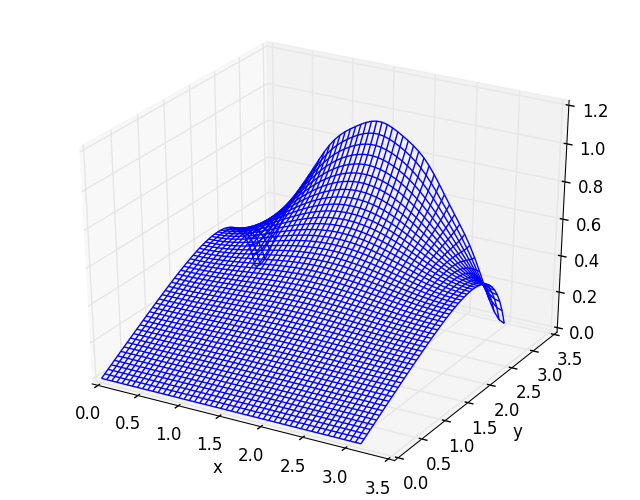

PyObject <matplotlib.text.Text object at 0x7fec2e45d150>

In [12]:
# Broje članova reda
l=10
u(xy)=Na0*xy[2]+sum([Na[k]*sinh.(k*xy[2]).*cos.(k*xy[1]) for k in collect(1:l)]) 
mesh(X,Y,Matrix(map(u,XY)'))
xlabel("x")
ylabel("y")

In [13]:
# Provjera rubnog uvjeta
x=range(0,stop=pi,length=m)
y=sin.(x)
z=Na0*pi.+sum([Na[k]*sinh.(k*pi)*cos.(k*x) for k=1:10])

50-element Array{Float64,1}:
 0.05787452476068955
 0.07194838047976637
 0.1118588415858498 
 0.17131735147542554
 0.24177874475811562
 0.31467406858624564
 0.3834409501726587 
 0.44473689684195494
 0.498528775836505  
 0.5471506718578483 
 0.5937655810960227 
 0.6408327853540378 
 0.6891212064466555 
 ⋮                  
 0.6408327853540378 
 0.5937655810960228 
 0.5471506718578483 
 0.49852877583650534
 0.44473689684195505
 0.3834409501726587 
 0.3146740685862458 
 0.24177874475811567
 0.17131735147542565
 0.11185884158585002
 0.0719483804797666 
 0.05787452476068955

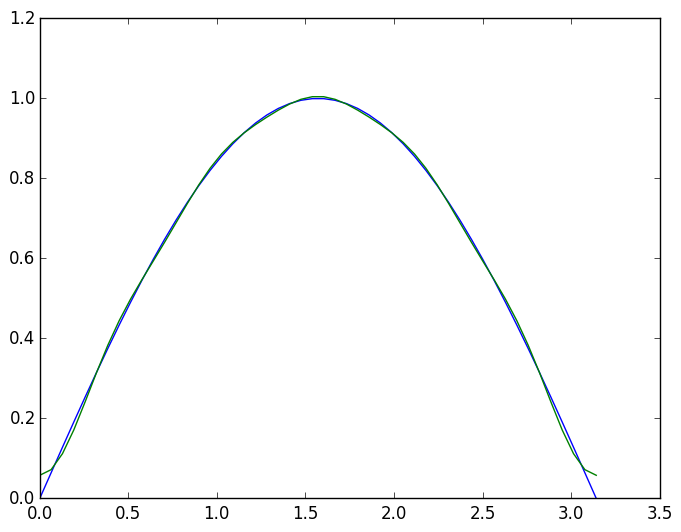

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fec2dc56990>
 PyObject <matplotlib.lines.Line2D object at 0x7fec2dc56c50>

In [14]:
plot(x,y,x,z)